In [28]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

#load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Bentuk data train x:", x_train.shape)
print("Bentuk data test x:", x_test.shape)
print("Bentuk data train y:", y_train.shape)
print("Bentuk data test y:", y_test.shape)
print("Rentang nilai piksel:", x_train.min(), "-", x_train.max())

Bentuk data train x: (60000, 28, 28)
Bentuk data test x: (10000, 28, 28)
Bentuk data train y: (60000,)
Bentuk data test y: (10000,)
Rentang nilai piksel: 0 - 255


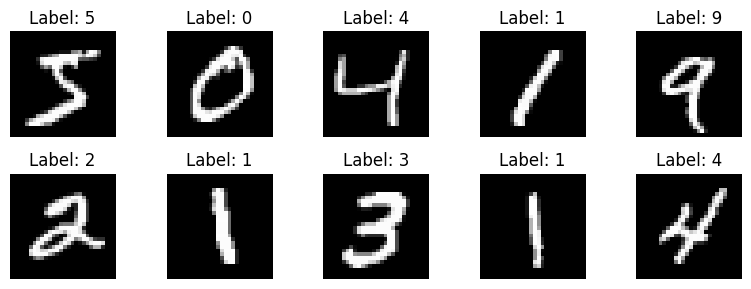

In [29]:
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Bentuk data train setelah reshape:", x_train.shape)
print("Rentang nilai baru:", x_train.min(), "-", x_train.max())

Bentuk data train setelah reshape: (60000, 28, 28, 1)
Rentang nilai baru: 0.0 - 1.0


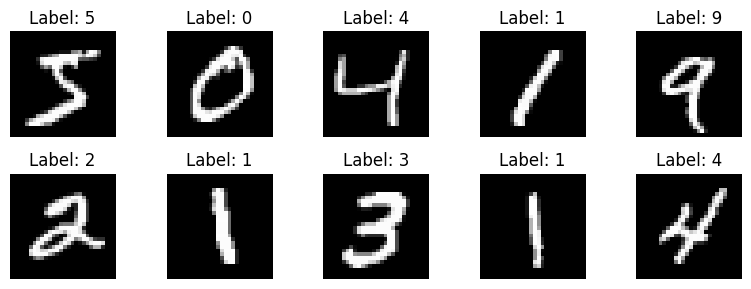

In [31]:
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # Lapisan konvolusi 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    # Lapisan konvolusi 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Ubah hasil konvolusi jadi vektor 1D
    Flatten(),

    # Lapisan fully connected (dense)
    Dense(128, activation='relu'),
    Dropout(0.5),  # mengurangi overfitting

    # Lapisan output (10 kelas angka 0–9)
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8107 - loss: 0.6039 - val_accuracy: 0.9826 - val_loss: 0.0586
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9681 - loss: 0.1053 - val_accuracy: 0.9857 - val_loss: 0.0409
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9771 - loss: 0.0784 - val_accuracy: 0.9893 - val_loss: 0.0332
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9814 - loss: 0.0617 - val_accuracy: 0.9898 - val_loss: 0.0304
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9852 - loss: 0.0497 - val_accuracy: 0.9909 - val_loss: 0.0272
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9859 - loss: 0.0443 - val_accuracy: 0.9890 - val_loss: 0.0303
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9888 - loss: 0.0348 - val_accuracy: 0.9905 - val_loss: 0.0283
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9891 - loss: 0.0332 - val_accuracy: 0

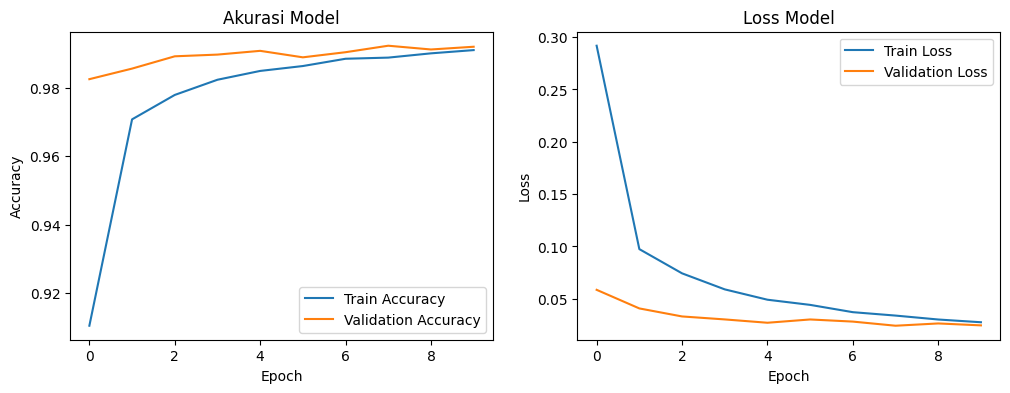

In [35]:
plt.figure(figsize=(12, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)

print('-' * 40)
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]*100:.2f}%")
print('-' * 40)

----------------------------------------
Test Loss: 0.0247
Test Accuracy: 99.21%
----------------------------------------


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

target_digits = [0, 9, 0]

image_files = sorted(glob.glob("/content/handwritten_data/*.jpg"))

processed_images = []
true_labels = []

for path in image_files:
    # Baca gambar dan konversi ke grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Resize ke 28x28
    img = cv2.resize(img, (28, 28))

    # Inversi warna (putih jadi hitam, hitam jadi putih)
    img = 255 - img

    # Normalisasi ke 0–1
    img = img.astype('float32') / 255.0

    # Reshape ke (28,28,1)
    img = img.reshape(28, 28, 1)

    processed_images.append(img)

    # Ambil label dari nama file (misal 'angka2_3.jpg' -> label 2)
    # Fix: Ambil label dari bagian pertama nama file (misal '0_1.jpg' -> label 0)
    label = int(path.split('/')[-1].split('_')[0])
    true_labels.append(label)

# Ubah ke array
processed_images = np.array(processed_images)
true_labels = np.array(true_labels)

print("Jumlah gambar:", processed_images.shape[0])
print("Bentuk tiap gambar:", processed_images.shape[1:])

Jumlah gambar: 30
Bentuk tiap gambar: (28, 28, 1)


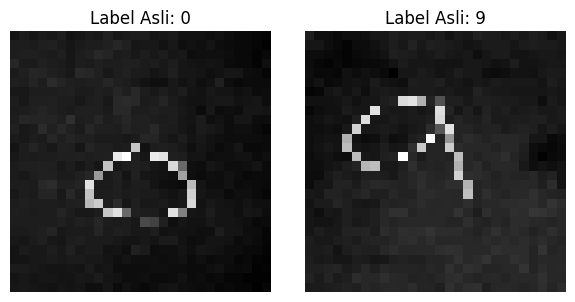

In [38]:
unique_digits = np.unique(true_labels)
# Ambil maksimal 3 angka unik saja
unique_digits = unique_digits[:3]

plt.figure(figsize=(9, 3))
for i, digit in enumerate(unique_digits):
    # Ambil index pertama yang cocok dengan label digit
    idx = np.where(true_labels == digit)[0][0]

    plt.subplot(1, 3, i + 1)
    plt.imshow(processed_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label Asli: {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [39]:
predictions = model.predict(processed_images)
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


In [40]:
correct = np.sum(predicted_labels == true_labels)
total = len(true_labels)
accuracy = correct / total * 100

print(f"Akurasi Model A pada tulisan tangan kamu: {accuracy:.2f}%")

# Tampilkan hasil per gambar
for i in range(total):
    print(f"Citra ke-{i+1} (angka {true_labels[i]}): Prediksi model: {predicted_labels[i]}",
          "✅ Benar" if predicted_labels[i]==true_labels[i] else "❌ Salah")

Akurasi Model A pada tulisan tangan kamu: 36.67%
Citra ke-1 (angka 0): Prediksi model: 6 ❌ Salah
Citra ke-2 (angka 0): Prediksi model: 0 ✅ Benar
Citra ke-3 (angka 0): Prediksi model: 0 ✅ Benar
Citra ke-4 (angka 0): Prediksi model: 0 ✅ Benar
Citra ke-5 (angka 0): Prediksi model: 0 ✅ Benar
Citra ke-6 (angka 0): Prediksi model: 6 ❌ Salah
Citra ke-7 (angka 0): Prediksi model: 0 ✅ Benar
Citra ke-8 (angka 0): Prediksi model: 9 ❌ Salah
Citra ke-9 (angka 0): Prediksi model: 6 ❌ Salah
Citra ke-10 (angka 0): Prediksi model: 6 ❌ Salah
Citra ke-11 (angka 0): Prediksi model: 0 ✅ Benar
Citra ke-12 (angka 0): Prediksi model: 0 ✅ Benar
Citra ke-13 (angka 0): Prediksi model: 0 ✅ Benar
Citra ke-14 (angka 0): Prediksi model: 7 ❌ Salah
Citra ke-15 (angka 0): Prediksi model: 0 ✅ Benar
Citra ke-16 (angka 0): Prediksi model: 8 ❌ Salah
Citra ke-17 (angka 0): Prediksi model: 9 ❌ Salah
Citra ke-18 (angka 0): Prediksi model: 9 ❌ Salah
Citra ke-19 (angka 0): Prediksi model: 5 ❌ Salah
Citra ke-20 (angka 0): Predik

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Menampilkan 5 contoh prediksi yang salah:


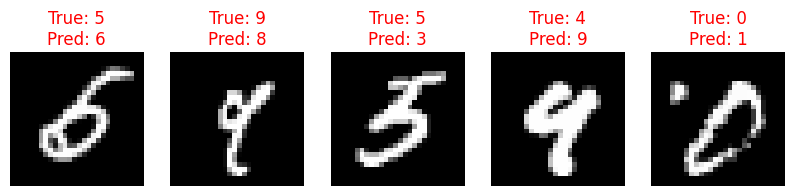

In [41]:
# Lakukan prediksi
y_pred_cat = model.predict(x_test)
y_pred = np.argmax(y_pred_cat, axis=1) # Ubah one-hot menjadi label digit

# Cari 5 index gambar yang diprediksi salah
misclassified_indices = np.where(y_pred != y_test)[0]
np.random.shuffle(misclassified_indices)
display_count = min(5, len(misclassified_indices))

plt.figure(figsize=(10, 2))
print(f"Menampilkan {display_count} contoh prediksi yang salah:")
for i in range(display_count):
    idx = misclassified_indices[i]
    plt.subplot(1, display_count, i + 1)
    # Ambil gambar dari x_test, hilangkan dimensi channel (squeeze)
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", color='red')
    plt.axis('off')

plt.show()

In [42]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load ulang dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Ubah dari grayscale ke RGB (3 channel)
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)

# Resize dari 28x28 → 48x48 agar sesuai input VGG16
x_train = tf.image.resize(x_train, [48, 48])
x_test = tf.image.resize(x_test, [48, 48])

# Normalisasi
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding untuk 10 kelas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Bentuk data train:", x_train.shape)
print("Bentuk data test :", x_test.shape)

Bentuk data train: (60000, 48, 48, 3)
Bentuk data test : (10000, 48, 48, 3)


In [43]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load VGG16 tanpa top layer (FC layer)
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(48, 48, 3)
)

In [44]:
for layer in base_model.layers:
    layer.trainable = False

In [45]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

modelB = Model(inputs=base_model.input, outputs=output)

In [46]:
modelB.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
historyB = modelB.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,
    batch_size=64,
    verbose=1
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.7026 - loss: 0.9695 - val_accuracy: 0.9396 - val_loss: 0.2171
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9265 - loss: 0.2449 - val_accuracy: 0.9559 - val_loss: 0.1435
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9481 - loss: 0.1732 - val_accuracy: 0.9639 - val_loss: 0.1164
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9580 - loss: 0.1383 - val_accuracy: 0.9687 - val_loss: 0.1030
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9615 - loss: 0.1262 - val_accuracy: 0.9687 - val_loss: 0.0975


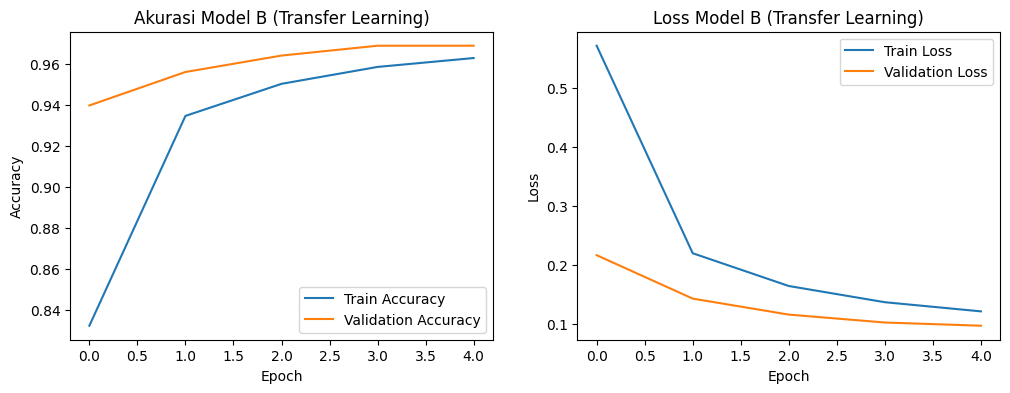

In [48]:
plt.figure(figsize=(12, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(historyB.history['accuracy'], label='Train Accuracy')
plt.plot(historyB.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model B (Transfer Learning)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(historyB.history['loss'], label='Train Loss')
plt.plot(historyB.history['val_loss'], label='Validation Loss')
plt.title('Loss Model B (Transfer Learning)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [49]:
test_loss, test_acc = modelB.evaluate(x_test, y_test, verbose=0)
print(f"Akurasi data uji Model B (VGG16 Transfer Learning): {test_acc:.4f}")

Akurasi data uji Model B (VGG16 Transfer Learning): 0.9687


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

target_digits = [1, 2, 5]

image_files = sorted(glob.glob("/content/handwritten_data/*.jpg"))

processed_images = []
true_labels = []

for path in image_files:
    # Baca gambar dan konversi ke grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Resize ke 28x28
    img = cv2.resize(img, (28, 28))

    # Inversi warna (putih jadi hitam, hitam jadi putih)
    img = 255 - img

    # Normalisasi ke 0–1
    img = img.astype('float32') / 255.0

    # Reshape ke (28,28,1)
    img = img.reshape(28, 28, 1)

    processed_images.append(img)

    # Ambil label dari nama file (misal 'angka2_3.jpg' -> label 2)
    # Fix: Ambil label dari bagian pertama nama file (misal '0_1.jpg' -> label 0)
    label = int(path.split('/')[-1].split('_')[0])
    true_labels.append(label)

# Ubah ke array
processed_images = np.array(processed_images)
true_labels = np.array(true_labels)

print("Jumlah gambar:", processed_images.shape[0])
print("Bentuk tiap gambar:", processed_images.shape[1:])

Jumlah gambar: 30
Bentuk tiap gambar: (28, 28, 1)


In [51]:
import cv2
import numpy as np

processed_images_rgb = []
for img in processed_images:
    # img awal masih 28x28 grayscale
    img_resized = cv2.resize(img, (48, 48))  # ubah ukuran ke 48x48
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)  # ubah ke 3 channel
    processed_images_rgb.append(img_rgb)

processed_images_rgb = np.array(processed_images_rgb).reshape(-1, 48, 48, 3)


In [52]:
predictions = modelB.predict(processed_images_rgb)
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi Model B terhadap 30 citra tulisan tangan: {accuracy * 100:.2f}%")

Akurasi Model B terhadap 30 citra tulisan tangan: 10.00%


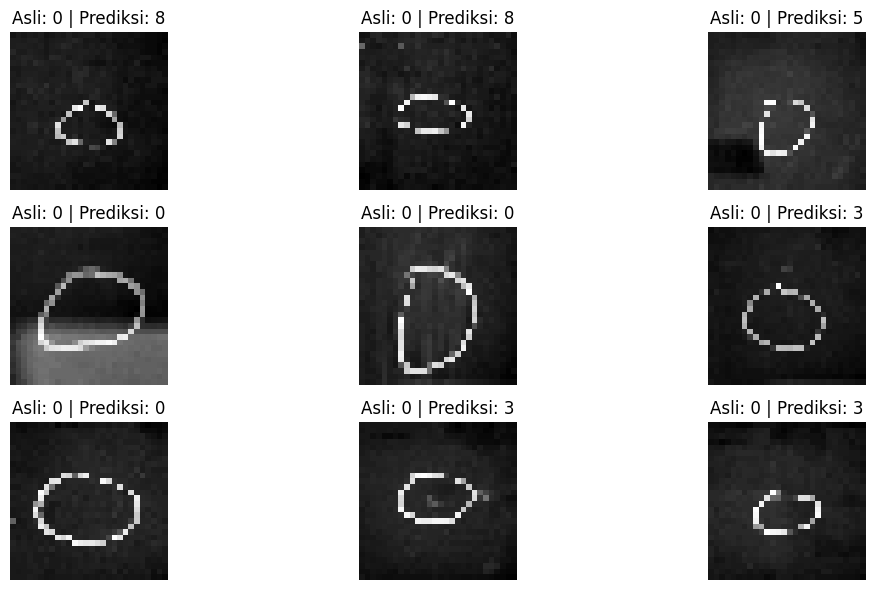

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(9):  # tampilkan 9 contoh
    plt.subplot(3, 3, i+1)
    plt.imshow(processed_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Asli: {true_labels[i]} | Prediksi: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
